In [1]:
from eib import *

In [2]:
for b in tqdm(BASINS):
    # Load the entire ibtracs dataset
    ib=huracanpy.load(source="ibtracs", ibtracs_subset=b, baselon = -180)
    # Rename Track IDs
    ib = ib.rename({"sid":"track_id"})
    # Keep only 6-hourly points
    #ib = ib.where(ib.time.dt.hour % 6 == 0, drop = True)
    # Remove empty variables
    null = (ib.isnull().sum() == len(ib.record))
    null_vars = [v for v in list(ib.variables.keys()) if null[v]]
    ib = ib.drop_vars(null_vars)
    # Convert winds to m/s
    wind_vars=[v for v in list(ib.variables.keys()) if v.endswith("_wind")]
    for v in wind_vars:
        ib[v] = ib[v] * 0.514444
    # Save the dataset
    huracanpy.save(ib, "ibtracs/ibtracs_"+b+".csv")

  0%|          | 0/7 [00:00<?, ?it/s]/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (12,21,139,159) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
 14%|█▍        | 1/7 [00:08<00:50,  8.34s/it]/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (12,21,61,66,139,159) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
 29%|██▊       | 2/7 [00:16<00:42,  8.45s/it]/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (12,17,18,21,22,61,66,77,139) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
 57%|█████▋    | 4/7 [00:23<00:13,  4.62s/it]/home/users/sbourdin/.conda/envs/hura

/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (44,53) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (12,21,61,66,77,91) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (12,17,18,21,22,61,66,77,85) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = load_function(filename, **kwargs)
/home/users/sbourdin/.conda/envs/huracanpy/lib/python3.13/site-packages/huracanpy/_data/_csv.py:65: DtypeWarning: Columns (17,18,21,93,102) have mixed types. Specify dtype option on import or set low_memory=False.
  trac

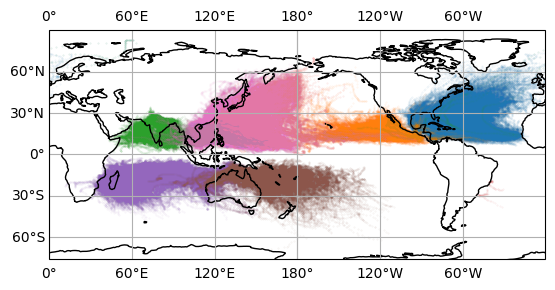

In [4]:
# Plot the different basins
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ax.gridlines(draw_labels=True)
for b in BASINS:
    # Load the entire ibtracs dataset
    ib=huracanpy.load("ibtracs/ibtracs_"+b+".csv")
    ax.scatter(ib.lon, ib.lat, transform = ccrs.PlateCarree(), label = b, alpha = 0.1, s = 0.1)
plt.savefig("figs/ib_basins.png", bbox_inches = "tight")

In [5]:
ib.lon.max()

<xarray.DataArray 'lon' ()> Size: 8B
array(179.9)